# Predictive Maintenance - Component Failure Analysis

This notebook focuses on analyzing feature importance to understand which components contribute most to fraudulent transactions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Load dataset
df = pd.read_csv("data/creditcard.csv")

# Split features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Normalize 'Amount' and 'Time'
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [3]:
# Train Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(10)


Feature  Importance
17     V17    0.165476
12     V12    0.132559
14     V14    0.127484
10     V10    0.079081
16     V16    0.070014
11     V11    0.055651
9       V9    0.036987
18     V18    0.031492
4       V4    0.029619
7       V7    0.028580

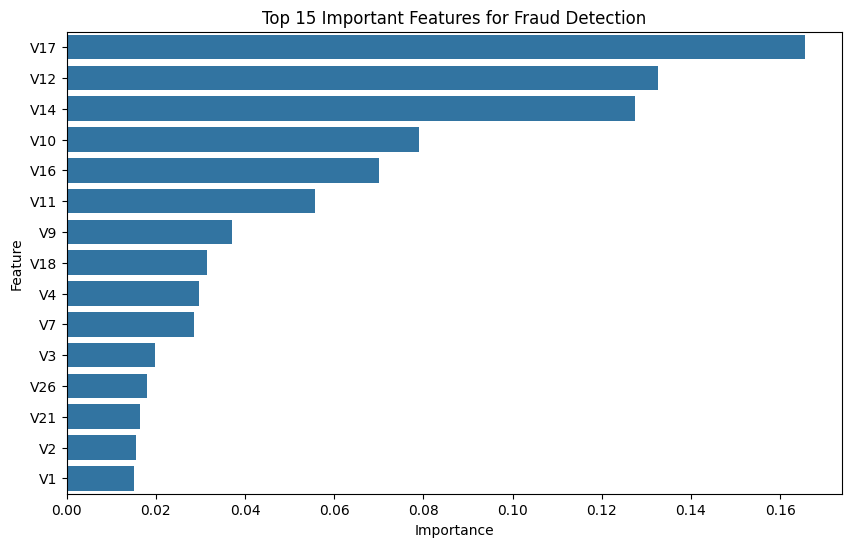

In [4]:
# Plot top important features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Important Features for Fraud Detection')
plt.show()
